<a href="https://colab.research.google.com/github/AlyssaTang/FutureMakers/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

from keras.optimizers import Adam, SGD

from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #no need to split data ourselves since mnist data comes w/ the split already

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts')

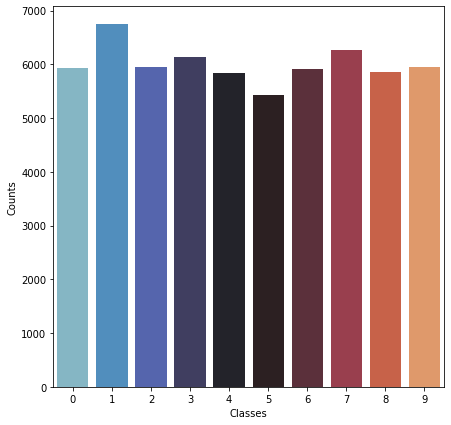

In [4]:
#Label counts

plt.figure(figsize=(7,7))
g = sns.countplot(y_train, palette="icefire")
plt.xlabel("Classes")
plt.ylabel("Counts")

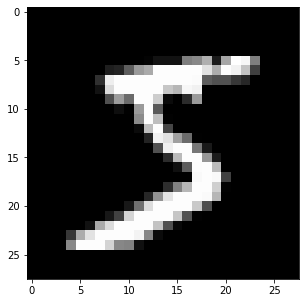

In [5]:
img = X_train[0]
plt.figure(figsize=(5,5))
plt.imshow(img,cmap = "gray")

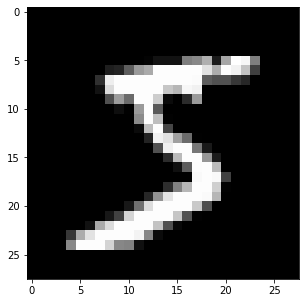

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

im2 = X_train[0]
plt.figure(figsize=(5,5))
plt.imshow(img,cmap = "gray")

In [12]:
y_train[0]

5

Use One Hot Encoder

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_train[0:10]

#if we did for (red, blue, green)
# then
# red - 0
# blue - 1
# green - 2
# then green would have much higher weight than red 
#to fix that, use one-hot encoding 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# Reshape. 4d (Batch_size, height, width, channel)
X_train.shape
#missing channel dimension

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

#-1 is hack (could also do X_train[0].shape) 

In [11]:
# Building our architecture 
# conv pooling conv pooling flatten dense dense 

model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) #(3,3), (5,5), (7,7) are good 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu')) #units = how many nodes per layer
model.add(Dropout(rate=0.2)) #0.2-0.5 are good rates, dropout most effective between fully connected layers
model.add(Dense(units=10, activation='softmax')) #softmax is similar to sigmoid

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        1810      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [13]:
# Optimizer

# optimizer = Adam(learning_rate=0.0001) #want function to reach min loss, learning_rate is step size
optimizer = SGD(learning_rate=0.001, momentum=0.99) #momentum - if loss function is going in certain direction, needs bigger weight value to take you in a diff direction. Good for outliers that could throw it off 
#learning rate ranges from 0.00001 - 0.001

In [14]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
BATCH_SIZE = 32 #update after looking at 1 image or all images? gradient descent, use powers of 2; 16, 32, 64 are good
# small batch size - if you have 1 that is labeled incorrectly or looks diff then more flucuation in loss, throwing model off more
# large batch size - limited how many can process at a time by RAM BUT more stable, outliers work better, takes longer to reach min though
EPOCHS = 10

#try changing batch size and leanring rate

In [16]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test)) 
#decreased learning rate from 0.01 to 0.001 since it was getting an accuracy of ~ 0.10 before
#when changed to 0.001, got ~ 0.11
#when restarted runtime, accuracy improved immensely - val_accuracy: 0.9902

Epoch 1/10
1875/1875 [==============================] - 50s 4ms/step - loss: 0.8082 - accuracy: 0.7269 - val_loss: 0.0732 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1012 - accuracy: 0.9690 - val_loss: 0.0498 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9763 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0450 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9832 - val_loss: 0.0367 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9856 - val_loss: 0.0388 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0380 - val_accuracy

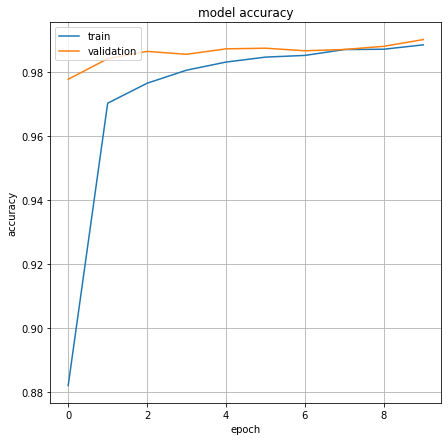

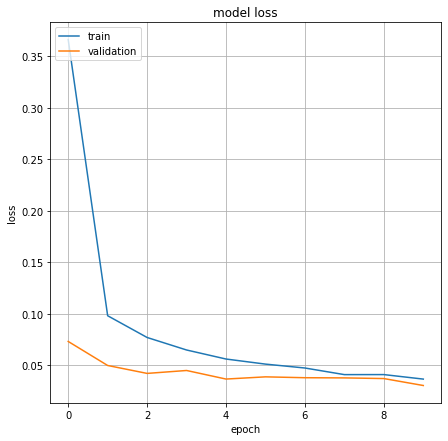

In [17]:
fig = plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Text(69.0, 0.5, 'Ground Truth')

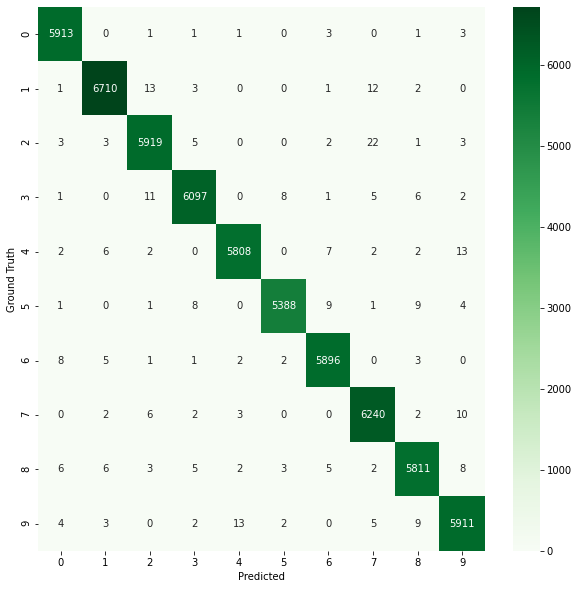

In [18]:
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train,axis=1)

y_true = np.argmax(y_train,axis=1)

cm = confusion_matrix(y_true=y_true,y_pred= y_pred_train)

fig = plt.figure(figsize=(10,10))
sns.heatmap(cm,cmap='Greens',annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")


In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9902


[0.030398525297641754, 0.9901999831199646]

Text(69.0, 0.5, 'Ground Truth')

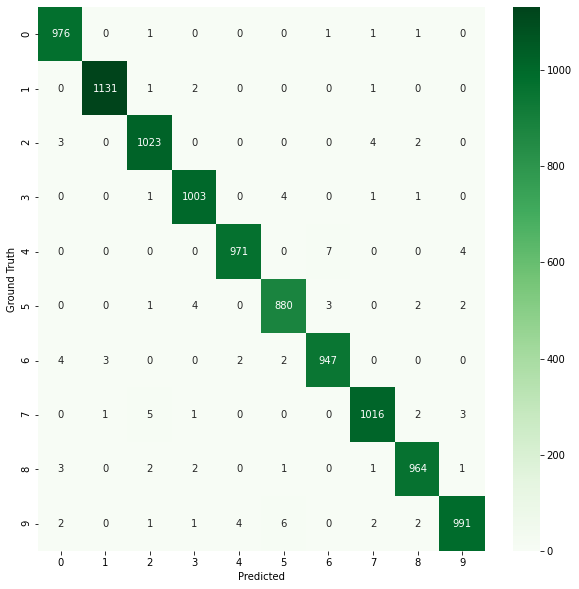

In [20]:
# Visualize test statistics

y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test,axis =1)

y_true_test = np.argmax(y_test,axis =1)

cm2 = confusion_matrix(y_true=y_true_test,y_pred= y_pred_test)

fig = plt.figure(figsize=(10,10))
sns.heatmap(cm2,cmap='Greens',annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
